In [1]:
import numpy as np
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# to avoid the warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement

# 2. Data Gathering

In [2]:
df = pd.read_csv('Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Domain Knowledge of Data

# 3. Exploratory Data Analysis(EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.1 Item_Identifier

In [4]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [5]:
df['Item_Identifier'].isna().sum()

0

In [6]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Item_Identifier'] = label_encoder.fit_transform(df['Item_Identifier'])

In [8]:
df['Item_Identifier'].value_counts()

1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [9]:
df['Item_Identifier'].value_counts().to_dict()

{1077: 10,
 413: 10,
 1542: 9,
 301: 9,
 35: 9,
 1066: 9,
 1454: 9,
 388: 9,
 1120: 9,
 1358: 9,
 1048: 9,
 1320: 9,
 921: 9,
 1088: 9,
 1383: 9,
 976: 9,
 398: 9,
 805: 9,
 1132: 9,
 1350: 9,
 1141: 9,
 750: 9,
 1107: 9,
 390: 9,
 702: 9,
 134: 9,
 1276: 9,
 324: 8,
 1529: 8,
 804: 8,
 961: 8,
 712: 8,
 950: 8,
 1230: 8,
 447: 8,
 1206: 8,
 894: 8,
 823: 8,
 853: 8,
 866: 8,
 538: 8,
 936: 8,
 1210: 8,
 1023: 8,
 985: 8,
 1204: 8,
 21: 8,
 578: 8,
 616: 8,
 1164: 8,
 854: 8,
 753: 8,
 175: 8,
 448: 8,
 43: 8,
 1133: 8,
 1211: 8,
 359: 8,
 591: 8,
 1169: 8,
 1363: 8,
 911: 8,
 2: 8,
 407: 8,
 1312: 8,
 1231: 8,
 148: 8,
 1086: 8,
 957: 8,
 41: 8,
 281: 8,
 436: 8,
 1158: 8,
 942: 8,
 552: 8,
 977: 8,
 687: 8,
 1235: 8,
 601: 8,
 37: 8,
 416: 8,
 1309: 8,
 1386: 8,
 1279: 8,
 1453: 8,
 933: 8,
 1510: 8,
 93: 8,
 495: 8,
 727: 8,
 838: 8,
 427: 8,
 1240: 8,
 38: 8,
 154: 8,
 370: 8,
 139: 8,
 1515: 8,
 366: 8,
 203: 8,
 1369: 8,
 531: 8,
 1153: 8,
 1543: 8,
 1435: 8,
 861: 8,
 1462: 8,
 

In [10]:
df = df.drop('Item_Identifier',axis = 1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### 3.2 Item_Weight

In [12]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [13]:
df['Item_Weight'].isnull().sum()

1463

In [14]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [15]:
df['Item_Weight'].median()

12.6

In [16]:
df['Item_Weight'].mean()

12.857645184135976

In [17]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [18]:
df['Item_Weight'].isnull().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### 3.3 Item_Fat_Content

In [20]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [21]:
df['Item_Fat_Content'].isna().sum()

0

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])

In [26]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
df['Item_Fat_Content'].value_counts().to_dict()

{0: 5517, 1: 3006}

In [28]:
fat_value = {'Low Fat': 0, 'Regular': 1}
fat_value

{'Low Fat': 0, 'Regular': 1}

In [29]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 699.3+ KB


### 3.4 Item_Visibility

In [30]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [31]:
df['Item_Visibility'].isnull().sum()

0

In [32]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 699.3+ KB


### 3.5 Item_Type

In [34]:
df['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [35]:
df['Item_Type'].isna().sum()

0

In [36]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [37]:
df = pd.get_dummies(df, columns= ['Item_Type'])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      6113 non-null   object 
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

### 36. Item_MRP

In [39]:
df['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [40]:
df['Item_MRP'].isnull().sum()

0

In [41]:
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      6113 non-null   object 
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

### 3.7 Outlet_Identifier

In [43]:
df['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [44]:
df['Outlet_Identifier'].isna().sum()

0

In [45]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [46]:
df =df.drop('Outlet_Identifier',axis = 1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      6113 non-null   object 
 6   Outlet_Location_Type             8523 non-null   object 
 7   Outlet_Type                      8523 non-null   object 
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

### 3.8 Outlet_Establishment_Year

In [48]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [49]:
df['Outlet_Establishment_Year'].isna().sum()

0

In [50]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [51]:
df['Outlet_Establishment_Year'].value_counts().to_dict()

{1985: 1463,
 1987: 932,
 1999: 930,
 1997: 930,
 2004: 930,
 2002: 929,
 2009: 928,
 2007: 926,
 1998: 555}

In [53]:
df['Outlet_Establishment_Year'] = label_encoder.fit_transform(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

0    1463
1     932
4     930
2     930
6     930
5     929
8     928
7     926
3     555
Name: Outlet_Establishment_Year, dtype: int64

In [55]:
Outlet_Year = {1985: 0,
 1987: 1,
 1999: 4,
 1997: 2,
 2004: 6,
 2002: 5,
 2009: 8,
 2007: 7,
 1998: 3}
Outlet_Year

{1985: 0,
 1987: 1,
 1999: 4,
 1997: 2,
 2004: 6,
 2002: 5,
 2009: 8,
 2007: 7,
 1998: 3}

### 3.9 Outlet_Size

In [56]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [57]:
df['Outlet_Size'].isna().sum()

2410

In [58]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [59]:
df['Outlet_Size'].value_counts().to_dict()

{'Medium': 2793, 'Small': 2388, 'High': 932}

In [60]:
df['Outlet_Size'].replace({'Medium': 1, 'Small': 2, 'High': 0},inplace = True)

In [61]:
df['Outlet_Size'].value_counts().astype(int)

1.0    2793
2.0    2388
0.0     932
Name: Outlet_Size, dtype: int32

In [62]:
outlet_size = {'Medium': 1, 'Small': 2, 'High': 0}
outlet_size

{'Medium': 1, 'Small': 2, 'High': 0}

In [63]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True)

In [64]:
df['Outlet_Size'].isna().sum()

0

In [65]:
df['Outlet_Size'].value_counts()

1.0    5203
2.0    2388
0.0     932
Name: Outlet_Size, dtype: int64

In [66]:

df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,4,1.0,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,8,1.0,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,4,1.0,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,3,1.0,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1,0.0,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0.0,Tier 3,Supermarket Type1,2778.3834,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,5,1.0,Tier 2,Supermarket Type1,549.2850,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,6,2.0,Tier 2,Supermarket Type1,1193.1136,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,8,1.0,Tier 3,Supermarket Type2,1845.5976,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   object 
 7   Outlet_Type                      8523 non-null   object 
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

### 3.10 Outlet_Location_Type

In [68]:
df['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [69]:
df['Outlet_Location_Type'].isna().sum()

0

In [70]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [71]:
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])

In [72]:
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [73]:
outlet_location_type = {'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}
outlet_location_type

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   int32  
 7   Outlet_Type                      8523 non-null   object 
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Type_Baking Goods           8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

### 3.11 Outlet_Type

In [75]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [76]:
df['Outlet_Type'].isna().sum()

0

In [77]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [78]:
df = pd.get_dummies(df,columns = ['Outlet_Type'])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,4,1.0,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,8,1.0,2,443.4228,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,4,1.0,0,2097.2700,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,3,1.0,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1,0.0,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0.0,2,2778.3834,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,5,1.0,1,549.2850,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,6,2.0,1,1193.1136,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,8,1.0,2,1845.5976,0,0,...,0,0,0,1,0,0,0,0,1,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   int32  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

### 3.15 Item_Outlet_Sales (## Target column ##)

In [80]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [81]:
df['Item_Outlet_Sales'].isnull().sum()

0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   int32  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

# 4 Feature Engineering

### 1. Item_Weight

<AxesSubplot:>

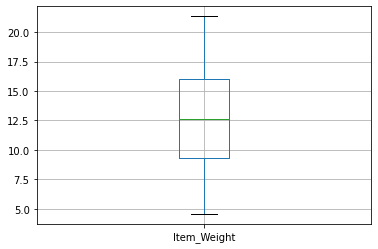

In [83]:
df[['Item_Weight']].boxplot()

### 2. Item_Fat_Content

<AxesSubplot:>

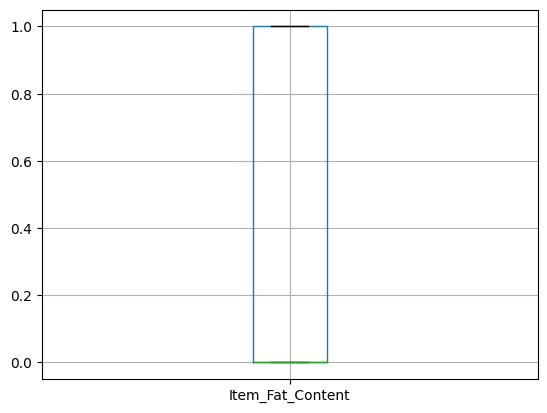

In [84]:
df[['Item_Fat_Content']].boxplot()

### 3.Item_Visibility

<AxesSubplot:>

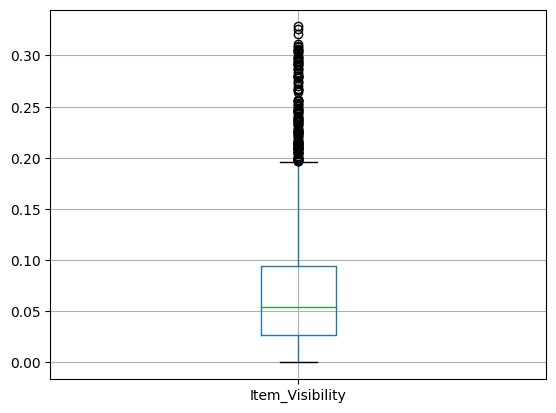

In [85]:
df[['Item_Visibility']].boxplot()

In [86]:
q1=df['Item_Visibility'].quantile(0.25)
q2=df['Item_Visibility'].quantile(0.50)
q3=df['Item_Visibility'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

q1--> 0.0269894775
q2--> 0.053930934
q3--> 0.0945852925
upper_tail--> 0.195979015
lower_tail--> -0.07440424500000001


In [87]:
df[['Item_Visibility']].loc[df['Item_Visibility']>upper_tail]

,Item_Visibility
49,0.255395
83,0.293418
108,0.278974
174,0.291865
334,0.204700
...,...
8292,0.209163
8345,0.266397
8371,0.214125
8432,0.227261


In [88]:
df[['Item_Visibility']].loc[df['Item_Visibility']<lower_tail]

,Item_Visibility


In [89]:
df['Item_Visibility'].mean()

0.06613202877895108

In [90]:
df['Item_Visibility'].median()

0.053930934

In [91]:
visibility_df=df[['Item_Visibility']].loc[(df['Item_Visibility'] < upper_tail) & 
                                   (df['Item_Visibility'] > lower_tail)].median()[0]
visibility_df                                               

0.05272914

In [92]:
df.loc[(df['Item_Visibility'] > upper_tail) |
       (df['Item_Visibility'] < lower_tail), 'Item_Visibility']=visibility_df

In [93]:
df[['Item_Visibility']].loc[df['Item_Visibility']<lower_tail]

,Item_Visibility


In [94]:
df[['Item_Visibility']].loc[df['Item_Visibility']>upper_tail]

,Item_Visibility


<AxesSubplot:>

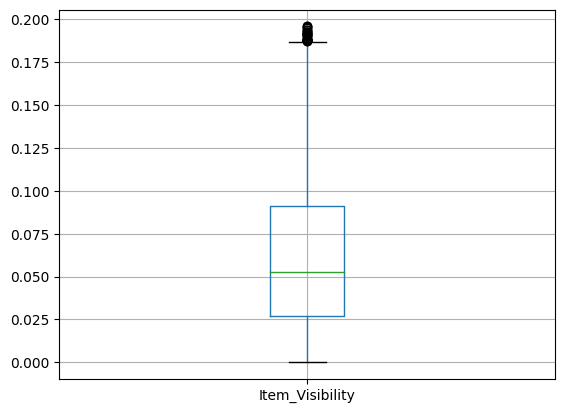

In [95]:
df[['Item_Visibility']].boxplot()

<AxesSubplot:xlabel='Item_Visibility'>

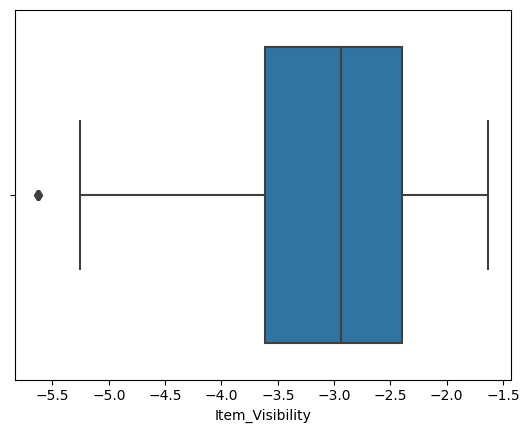

In [96]:
sns.boxplot(x=np.log(df['Item_Visibility']))

<AxesSubplot:>

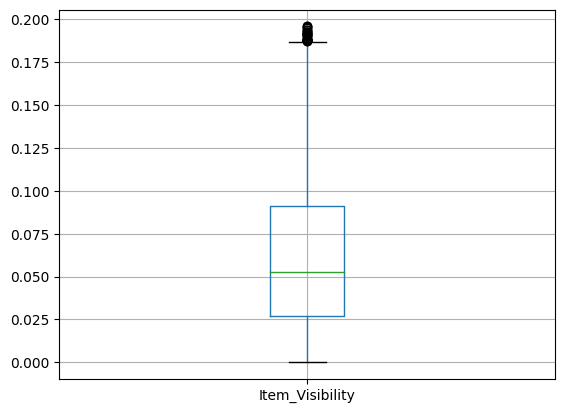

In [97]:
df[['Item_Visibility']].boxplot()

<AxesSubplot:xlabel='Item_Visibility'>

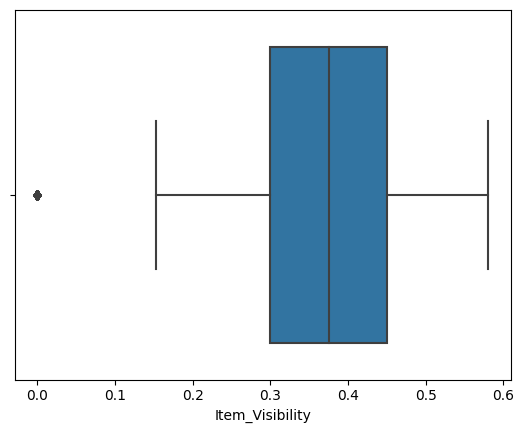

In [98]:
sns.boxplot(x=np.cbrt(df['Item_Visibility']))

<AxesSubplot:>

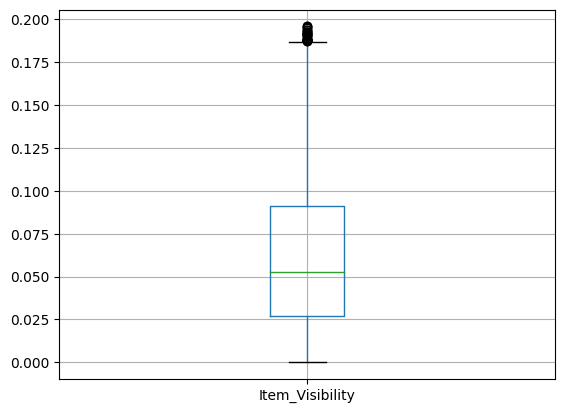

In [99]:
df[['Item_Visibility']].boxplot()

### 4. Item_MRP

<AxesSubplot:>

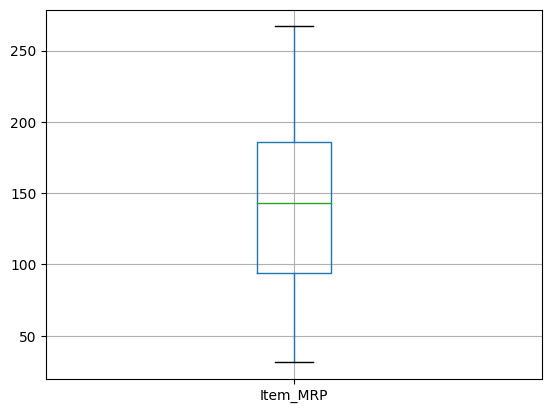

In [100]:
df[['Item_MRP']].boxplot()

### 6. Outlet_Size

<AxesSubplot:>

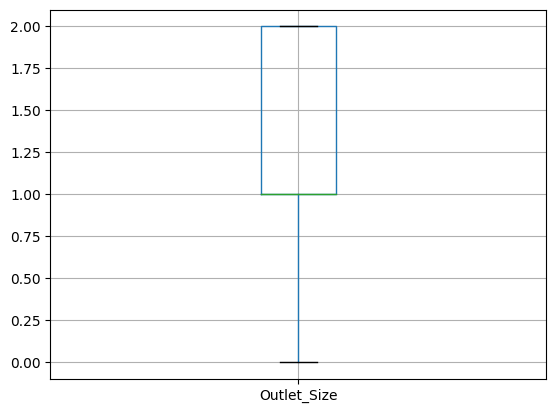

In [101]:
df[['Outlet_Size']].boxplot()

### 7. Outlet_Location_Type

<AxesSubplot:>

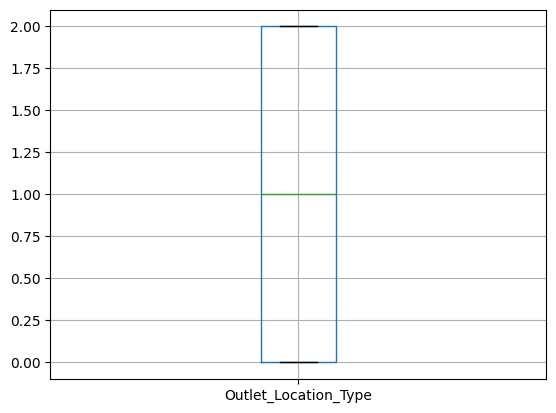

In [102]:
df[['Outlet_Location_Type']].boxplot()

# Model Training

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   float64
 6   Outlet_Location_Type             8523 non-null   int32  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

In [104]:
x = df.drop('Item_Outlet_Sales',axis=1)

y = df['Item_Outlet_Sales']

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### to create the instance of model

In [106]:
sales_product_model=LinearRegression()

In [107]:
sales_product_model.fit(x_train,y_train)

LinearRegression()

In [108]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1945,18.35,0,0.089345,191.9504,8,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1720,17.35,0,0.168065,176.2712,8,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1954,10.10,1,0.053887,225.6088,7,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1919,10.85,0,0.162904,104.9622,8,1.0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2461,7.17,1,0.059717,130.9968,6,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,12.60,1,0.052729,156.3946,0,2.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7813,12.60,0,0.178193,54.9956,0,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
905,17.85,0,0.065810,149.1050,2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5192,9.60,0,0.049618,44.2086,3,1.0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1070,13.500,0,0.055102,37.0874,5,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6305,12.500,1,0.074035,87.9198,8,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8504,12.600,0,0.124111,111.7544,0,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5562,12.500,1,0.073735,87.1198,2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1410,15.850,1,0.007140,40.8480,1,0.0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,7.575,0,0.055390,195.2768,2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7708,12.600,1,0.074222,255.9356,8,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3812,9.600,0,0.006693,164.9184,1,0.0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3928,12.600,0,0.097411,52.7324,0,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Metric Evalution

In [110]:
y_pred_test = sales_product_model.predict(x_test)

In [111]:
# testing data
y_pred_test = sales_product_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_test,y_pred_test)
print('mae-->',mae)
r2 = r2_score(y_test,y_pred_test)
print('r2 score-->',r2)

mse--> 1312533.250895746
rmse--> 1145.6584355276864
mae--> 856.0201173369173
r2 score--> 0.5572225720036597


In [112]:
# training data
y_pred_train = sales_product_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae-->',mae)
r2 = r2_score(y_train,y_pred_train)
print('r2 score-->',r2)

mse--> 1264584.6164982428
rmse--> 1124.5375122681514
mae--> 830.6927852268025
r2 score--> 0.563655459387528


# Testing on Single Row

In [113]:
column_names = x.columns
len(column_names)

27

In [114]:
x.head(1).T

,0
Item_Weight,9.300000
Item_Fat_Content,0.000000
Item_Visibility,0.016047
Item_MRP,249.809200
Outlet_Establishment_Year,4.000000
Outlet_Size,1.000000
Outlet_Location_Type,0.000000
Item_Type_Baking Goods,0.000000
Item_Type_Breads,0.000000
Item_Type_Breakfast,0.000000


In [115]:
column_names

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [116]:
fat_value = {'Low Fat': 0, 'Regular': 1}
print('fat_value-->',fat_value)
year_value = {1985: 0,1987: 1,1999: 4,1997: 2,2004: 6,2002: 5,2009: 8,2007: 7,1998: 3}
print('year_value-->',year_value)
outlet_size = {'Medium': 1, 'Small': 2, 'High': 0}
print('outlet_size-->',outlet_size)
outlet_location_type = {'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}
print('outlet_location_type-->',outlet_location_type)

fat_value--> {'Low Fat': 0, 'Regular': 1}
year_value--> {1985: 0, 1987: 1, 1999: 4, 1997: 2, 2004: 6, 2002: 5, 2009: 8, 2007: 7, 1998: 3}
outlet_size--> {'Medium': 1, 'Small': 2, 'High': 0}
outlet_location_type--> {'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}


In [131]:
Item_Weight = 15.6
Item_Fat_Content = 'Regular'
Item_Visibility = 0.05687
Item_MRP = 325.55
Outlet_Establishment_Year = 2009
Outlet_Size = 'High'
Outlet_Location_Type = 'Tier 3'
Item_Type = 'Fruits and Vegetables'
Outlet_Type = 'Grocery Store'
# one hot encoding

Item_Type_col = 'Item_Type_' + Item_Type
print('Item_Type-->',Item_Type_col)


Outlet_Type_col = 'Outlet_Type_' + Outlet_Type
print('Outlet_Type-->',Outlet_Type_col)



# sales of product = ?

Item_Type--> Item_Type_Fruits and Vegetables
Outlet_Type--> Outlet_Type_Grocery Store


In [132]:
sales_data_col = {"Item_Fat_Content":fat_value, "Outlet_Establishment_Year":year_value,"Outlet_Size":outlet_size,
                  "Outlet_Location_Type":outlet_location_type, "columns":list(column_names)}
sales_data_col

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
 'Outlet_Establishment_Year': {1985: 0,
  1987: 1,
  1999: 4,
  1997: 2,
  2004: 6,
  2002: 5,
  2009: 8,
  2007: 7,
  1998: 3},
 'Outlet_Size': {'Medium': 1, 'Small': 2, 'High': 0},
 'Outlet_Location_Type': {'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388},
 'columns': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Item_Type_Baking Goods',
  'Item_Type_Breads',
  'Item_Type_Breakfast',
  'Item_Type_Canned',
  'Item_Type_Dairy',
  'Item_Type_Frozen Foods',
  'Item_Type_Fruits and Vegetables',
  'Item_Type_Hard Drinks',
  'Item_Type_Health and Hygiene',
  'Item_Type_Household',
  'Item_Type_Meat',
  'Item_Type_Others',
  'Item_Type_Seafood',
  'Item_Type_Snack Foods',
  'Item_Type_Soft Drinks',
  'Item_Type_Starchy Foods',
  'Outlet_Type_Grocery Store',
  'Outlet_Type_Supermarket Type1',
  'Outlet_Type_Supermarket Type2',
  'Outlet_Type

In [133]:
# label encoding
sales_data_col['Item_Fat_Content'][Item_Fat_Content]
sales_data_col['Outlet_Establishment_Year'][Outlet_Establishment_Year]
sales_data_col['Outlet_Size'][Outlet_Size]
sales_data_col['Outlet_Location_Type'][Outlet_Location_Type]

3350

In [134]:
array = np.zeros(len(column_names), dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [135]:
# one hot encoding

Item_Type_col = 'Item_Type_' + Item_Type
print('Item_Type-->',Item_Type_col)


Outlet_Type_col = 'Outlet_Type_' + Outlet_Type
print('Outlet_Type-->',Outlet_Type_col)

Item_Type_index = np.where(column_names == Item_Type_col)[0][0]
print('Item_Type_index-->',Item_Type_index)

Outlet_Type_index = np.where(column_names == Outlet_Type_col)[0][0]
print('Outlet_Type_index-->',Outlet_Type_index)

Item_Type--> Item_Type_Fruits and Vegetables
Outlet_Type--> Outlet_Type_Grocery Store
Item_Type_index--> 13
Outlet_Type_index--> 23


In [136]:
array[0] = Item_Weight
array[1] = sales_data_col['Item_Fat_Content'][Item_Fat_Content]
array[2] = Item_Visibility
array[3] = Item_MRP
array[4] = Outlet_Establishment_Year
array[5] = sales_data_col['Outlet_Establishment_Year'][Outlet_Establishment_Year]
array[6] = sales_data_col['Outlet_Size'][Outlet_Size]
array[7] = sales_data_col['Outlet_Location_Type'][Outlet_Location_Type]

array[Item_Type_index] = 1
array[Outlet_Type_index] = 1
array

array([  15,    1,    0,  325, 2009,    8,    0, 3350,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0])

In [141]:
predict_sales_product = sales_product_model.predict([array])[0]
print(f"Predict sales product specific outlet --> {predict_sales_product} RS")

Predict sales product specific outlet --> 8909.136656504743 RS


In [138]:
# Save Model in Pickle File
import pickle

with open("sales_product_model.pkl", "wb") as f:
    pickle.dump(sales_product_model, f)

In [139]:
# Store all this values in JSON

import json

with open("sales_data_col.json", "w") as f:
    json.dump(sales_data_col, f)